<a href="https://colab.research.google.com/github/CamilaSDantas/vacina_covid19_pernambuco/blob/main/DadosDe_VACINAxIDhPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breve Análise dos dados de vacinação em Pernambuco**

- instalações e importações necessárias;

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
municipios = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/coordmunicipios.csv')
idhm = pd.read_csv('/content/drive/MyDrive/001-VACINA/idhpe.csv', decimal=',')
covid = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/PEdadosVACINA.csv',sep=';', decimal=',')

- visualizando o topo dos Dataframes;

In [ ]:
municipios.head()

,Codmun,Município,latitude,longitude
0,260005,ABREU E LIMA,-7.90072,-34.8984
1,260010,AFOGADOS DA INGAZEIRA,-7.74312,-37631.0000
2,260020,AFRÂNIO,-8.51136,-41.0095
3,260030,AGRESTINA,-8.45966,-35.9447
4,260040,ÁGUA PRETA,-8.70609,-35.5263


In [ ]:
idhm.head()

,Codmun6,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,260005,ABREU E LIMA,0.679,0.632,0.791,0.625
1,260010,AFOGADOS DA INGAZEIRA,0.657,0.565,0.807,0.623
2,260020,AFRÂNIO,0.588,0.493,0.761,0.542
3,260030,AGRESTINA,0.592,0.470,0.760,0.581
4,260040,ÁGUA PRETA,0.553,0.432,0.761,0.514


In [ ]:
covid.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,260530,EXU,PE,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,260845,LAGOA DO CARRO,PE,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,260290,CABO DE SANTO AGOSTINHO,PE,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,261640,VITORIA DE SANTO ANTAO,PE,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,261610,VERDEJANTE,PE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


- Usando o método Describe obtemos importantes informações estatísticas, como o desvio padrão do IDH no estado(IDHM), valores mínimo e máximo, média e quartis;

In [ ]:
idhm.describe()

,Codmun6,IDHM,IDHM_E,IDHM_L,IDHM_R
count,171.000000,171.000000,170.000000,170.000000,170.000000
mean,260760.801170,0.595953,0.490206,0.755547,0.573976
std,431.933119,0.048275,0.069077,0.035587,0.047548
min,260005.000000,0.487000,0.354000,0.676000,0.477000
25%,260396.000000,0.567000,0.440250,0.730250,0.543000
50%,260775.000000,0.593000,0.488500,0.758000,0.565500
75%,261135.000000,0.612500,0.523750,0.780500,0.595000
max,261520.000000,0.788000,0.748000,0.839000,0.798000


- selecionando as colunas necessárias no Dataframe "covid";

In [ ]:
colunas = ['paciente_idade', 'paciente_enumsexobiologico', 'paciente_racacor_valor','estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome', 'estabelecimento_uf', 'vacina_grupoatendimento_nome', 'vacina_nome']
covid = covid[colunas]

- eliminando valores Not a Number possivelmente existentes;

In [ ]:
covid = covid.dropna()

In [ ]:
covid.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,260530,EXU,PE,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,260845,LAGOA DO CARRO,PE,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,260290,CABO DE SANTO AGOSTINHO,PE,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,261640,VITORIA DE SANTO ANTAO,PE,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,261610,VERDEJANTE,PE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


- conversão do tipo da variável idade para inteiro;

In [ ]:
vacinacao.paciente_idade = vacinacao.paciente_idade.astype('int64')

- agrupando as informações de "idhm" e "covid" em um único Dataframe;

In [ ]:
vacinacao = pd.merge(idhm,covid,left_on='Codmun6', right_on='estabelecimento_municipio_codigo')

- assim obtemos um Dataframe com dados sobre IDH das cidades das pessoas vacinadas;

In [ ]:
vacinacao.head()

,Codmun6,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_nome
0,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,48.0,M,SEM INFORMACAO,260005,ABREU E LIMA,PE,Outros,Covid-19-Coronavac-Sinovac/Butantan
1,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,53.0,M,PRETA,260005,ABREU E LIMA,PE,Ensino Básico,Vacina Covid-19 - Covishield
2,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,26.0,M,SEM INFORMACAO,260005,ABREU E LIMA,PE,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
3,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,59.0,F,AMARELA,260005,ABREU E LIMA,PE,Diabetes Mellitus,Vacina Covid-19 - Covishield
4,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,34.0,F,PARDA,260005,ABREU E LIMA,PE,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...


- visualizando dados sobre as vacinas mais aplicadas no estado;

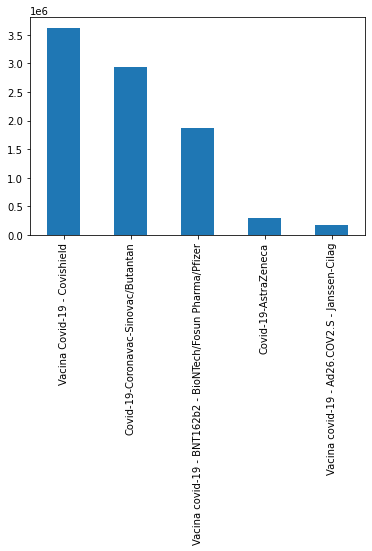

In [ ]:
vacinacao['vacina_nome'].value_counts().plot(kind='bar')

- visualizando dados sobre o sexo majoritariamente vacinado no estado;

In [ ]:
sexo = vacinacao['paciente_enumsexobiologico'].value_counts()

In [ ]:
sexo.head()

F    4899690
M    4001632
I         12
Name: paciente_enumsexobiologico, dtype: int64

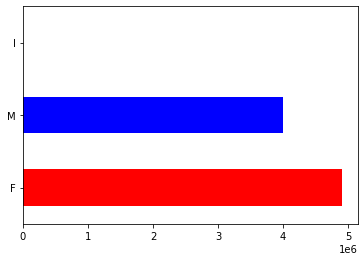

In [ ]:
sexo.plot(kind='barh', color = ['red', 'blue'])

- através do gráfico acima percebemos que as mulheres aceitam melhor a campanha de vacinação, visto que representaram 55,04% do total de vacinados. Porém é fundamental considerar que, segundo dados do IBGE, no estado de Pernambuco, 52,28% dos habitantes são do sexo feminino.

- analisando dados sobre Cor da população vacinada;

In [ ]:
cor = vacinacao['paciente_racacor_valor'].value_counts()

In [ ]:
cor.head()

SEM INFORMACAO    2640913
PARDA             2312382
AMARELA           2083226
BRANCA            1520392
PRETA              285964
Name: paciente_racacor_valor, dtype: int64

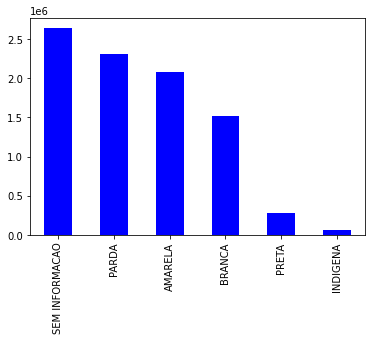

In [ ]:
cor.plot(kind='bar', color = ['blue'])

- Acima, a informação majoritária "sem informação" não foi ocultada, visto que, por se tratar da grande maioria, nos leva à reflexão sobre o desconhecimento de grande parte da população a respeito de sua identificação cultural e ascendência étnica. Acreditamos que grande parte dos que não declararam informação sobre cor integram a população negra periférica, submetida a um longo processo de alienação da sua identidade ancestral.

In [ ]:
grupo = vacinacao['vacina_grupoatendimento_nome'].value_counts()

In [ ]:
grupo.head()

Pessoas de 60 a 64 anos    2907902
Pessoas de 18 a 64 anos    2317980
Pessoas de 65 a 69 anos     526503
Pessoas de 70 a 74 anos     402929
Outros                      388566
Name: vacina_grupoatendimento_nome, dtype: int64

- acima, vemos que o grupo mais atendido pela vacinação foi o grupo pertencente à faixa etária de 60 a 64 anos;

In [ ]:
grupo.sort_values()

Técnico em Saúde Bucal - TSB                      23
Indivíduos Transplantados de Medula Óssea         51
Técnico de Veterinário                            91
Doula/Parteira                                   191
Metroviário                                      202
                                              ...   
Outros                                        388566
Pessoas de 70 a 74 anos                       402929
Pessoas de 65 a 69 anos                       526503
Pessoas de 18 a 64 anos                      2317980
Pessoas de 60 a 64 anos                      2907902
Name: vacina_grupoatendimento_nome, Length: 93, dtype: int64

- acima, categorias muito específicas contam os menores números em grupos de vacinação;

- abaixo, a análise dos dados de quantidade de vacinas por cidade, segue o quantitativo por cidades mais populosas do estado;

In [ ]:
dadosCidades = vacinacao['estabelecimento_municipio_nome']

In [ ]:
dadosCidades.value_counts()

RECIFE                     1999419
JABOATAO DOS GUARARAPES     624430
CARUARU                     396344
PETROLINA                   347998
OLINDA                      277930
                            ...   
PALMEIRINA                    6828
ITACURUBA                     6563
CALUMBI                       6521
SOLIDAO                       5609
INGAZEIRA                     5396
Name: estabelecimento_municipio_nome, Length: 171, dtype: int64

- abaixo, verificamos quais os grupos etários com maior contingente populacional contemplado pela vacinação
;

In [ ]:
idade= vacinacao['paciente_idade'].value_counts()

In [ ]:
idade.head()

40.0    178604
39.0    177633
43.0    173895
38.0    172301
41.0    171916
Name: paciente_idade, dtype: int64

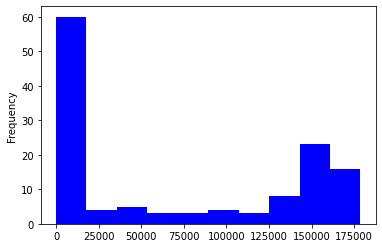

In [ ]:
idade.plot(kind='hist', color = ['blue'])

- na sequência, importamos dados no formato mapa do estado de pernambuco, com as cidades trabalhadas e sua divisão por região;

In [ ]:
mapape = gpd.read_file('/content/drive/MyDrive/Covid19 dados tcc/tcc/PE_Mun97_region.shx')

In [ ]:
mapape.head()

,CODMUN6,MUNIC_PIO,SEM_ACENTO,MUNIC_PI0,UF,UF_IBGE,REGI_O,MESO_IBGE,MESO_IBG0,MICRO_IBGE,MICRO_IB0,MESO_IBG1,MICRO_IB1,AREA_97,SEDE,SEDE0,N91,N96,CODCOMP,geometry
0,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707..."
1,261110,PETROLINA,PETROLINA,2611101,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,4737.130,-40.508,-9.393,0.0,191238.0,260200511101,"POLYGON ((-40.96774 -8.82765, -40.96902 -8.823..."
2,260515,DORMENTES,DORMENTES,2605152,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1386.278,-40.771,-8.447,13862.0,13252.0,260200505152,"POLYGON ((-40.86886 -8.36169, -40.86644 -8.362..."
3,260110,ARARIPINA,ARARIPINA,2601102,PE,26,NE,SERTAO PERNAMBUCANO,01,ARARIPINA,001,2601,260101,1906.338,-40.498,-7.576,63453.0,63841.0,260100101102,"POLYGON ((-40.71240 -7.47108, -40.70989 -7.465..."
4,261245,SANTA CRUZ,SANTA CRUZ,2612455,PE,26,NE,SERTAO PERNAMBUCANO,01,ARARIPINA,001,2601,260101,1426.077,-40.336,-8.240,10590.0,10904.0,260100112455,"POLYGON ((-40.55131 -8.28434, -40.55185 -8.281..."


In [ ]:
colunasMapaPE = ['CODMUN6', 'MUNIC_PIO', 'UF','MESO_IBGE', 'MICRO_IBGE', 'AREA_97', 'SEDE', 'SEDE0','geometry']
mapape = mapape[colunasMapaPE]

In [ ]:
mapape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CODMUN6     185 non-null    object  
 1   MUNIC_PIO   185 non-null    object  
 2   UF          185 non-null    object  
 3   MESO_IBGE   185 non-null    object  
 4   MICRO_IBGE  185 non-null    object  
 5   AREA_97     185 non-null    float64 
 6   SEDE        185 non-null    float64 
 7   SEDE0       185 non-null    float64 
 8   geometry    185 non-null    geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 13.1+ KB


In [ ]:
mapape.CODMUN6 = mapape.CODMUN6.astype('int64')

In [ ]:
mapape.head()

,CODMUN6,MUNIC_PIO,UF,MESO_IBGE,MICRO_IBGE,AREA_97,SEDE,SEDE0,geometry
0,260020,AFRÂNIO,PE,SAO FRANCISCO PERNAMBUCANO,PETROLINA,1482.423,-41.005,-8.515,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707..."
1,261110,PETROLINA,PE,SAO FRANCISCO PERNAMBUCANO,PETROLINA,4737.130,-40.508,-9.393,"POLYGON ((-40.96774 -8.82765, -40.96902 -8.823..."
2,260515,DORMENTES,PE,SAO FRANCISCO PERNAMBUCANO,PETROLINA,1386.278,-40.771,-8.447,"POLYGON ((-40.86886 -8.36169, -40.86644 -8.362..."
3,260110,ARARIPINA,PE,SERTAO PERNAMBUCANO,ARARIPINA,1906.338,-40.498,-7.576,"POLYGON ((-40.71240 -7.47108, -40.70989 -7.465..."
4,261245,SANTA CRUZ,PE,SERTAO PERNAMBUCANO,ARARIPINA,1426.077,-40.336,-8.240,"POLYGON ((-40.55131 -8.28434, -40.55185 -8.281..."


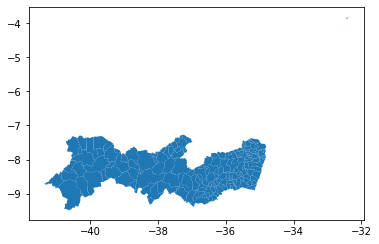

In [ ]:
mapape.plot()

- dessa forma, pretendemos trabalhar a visualização dos dados de vacinação por região e respectivo IDH das regiões vacinadas.